In [1]:
# 데이터 경로 설정 및 데이터 불러오기
import os
os.chdir(r"D:\강의 자료\2008_온라인 강의 머신러닝 성능 향상을 위한 데이터 탐색과 전처리 심화\데이터\실습 데이터")

import pandas as pd
df = pd.read_csv("Sonar_Mines_Rocks.csv")

In [2]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [3]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [4]:
Train_X.skew() # 왜도 확인 => Band4의 왜도가 가장 큼 => 어떻게 생겼는지 확인해보자

Band1     2.194642
Band2     2.409443
Band3     2.805095
Band4     3.609909
Band5     2.144178
Band6     1.177170
Band7     1.121557
Band8     1.649454
Band9     1.702358
Band10    1.209018
Band11    0.918190
Band12    0.632291
Band13    0.765334
Band14    1.081876
Band15    0.757306
Band16    0.721870
Band17    0.621809
Band18    0.453891
Band19    0.237074
Band20   -0.125714
Band21   -0.244635
Band22   -0.403430
Band23   -0.599557
Band24   -0.652765
Band25   -0.792215
Band26   -0.714548
Band27   -0.577352
Band28   -0.545941
Band29   -0.403646
Band30   -0.102859
Band31    0.266565
Band32    0.271633
Band33    0.390985
Band34    0.578128
Band35    0.553767
Band36    0.613149
Band37    0.693637
Band38    1.021794
Band39    0.898136
Band40    0.917089
Band41    0.978921
Band42    0.893498
Band43    0.970370
Band44    1.327613
Band45    1.415697
Band46    1.767197
Band47    1.988334
Band48    1.372863
Band49    1.337429
Band50    1.954509
Band51    2.893727
Band52    2.667888
Band53    0.

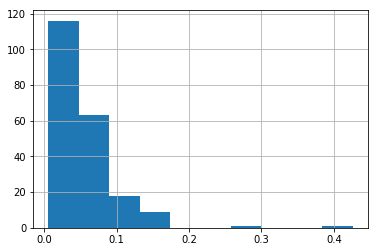

In [5]:
%matplotlib inline
df['Band4'].hist()

#### 치우침을 제거했을 때의 성능 비교를 위한 모델 개발

In [6]:
# 라벨 숫자로 바꾸기
Train_Y.replace({"M":-1, "R":1}, inplace = True)
Test_Y.replace({"M":-1, "R":1}, inplace = True)

In [7]:
# 원본 데이터로 모델링
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier as MLP
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.8484848484848485


In [8]:
# 왜도 기반 치우친 변수 제거 
import numpy as np
biased_variables = Train_X.columns[Train_X.skew().abs() > 1.5] # 왜도의 절대값이 1.5 이상인 컬럼만 가져오기

In [9]:
# 치우침 제거
Train_X[biased_variables] = Train_X[biased_variables] - Train_X[biased_variables].min() + 1
Train_X[biased_variables] = np.log10(Train_X[biased_variables])

C:\Users\GilseungAhn\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
# 치우침 제거 후 모델 평가
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)

# 테스트도 데이터도 같은 방법으로 전처리를 수행
Test_X[biased_variables] = Test_X[biased_variables] - Test_X[biased_variables].min() + 1
Test_X[biased_variables] = Test_X[biased_variables].apply(np.log)

pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.8666666666666666


C:\Users\GilseungAhn\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
